In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Step 1: Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Step 2: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Fit the model to the training data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Fit the model to the training data
training_set = train_datagen.flow_from_directory('Original_dataset', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory('Original_dataset', target_size=(64, 64), batch_size=32, class_mode='binary')

model.fit(training_set, steps_per_epoch=(800*2)//32, epochs=25, validation_data=test_set, validation_steps=(200*2)//32)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
50/50 [==============================] - 5s 91ms/step - loss: 0.8293 - accuracy: 0.5051 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/25
50/50 [==============================] - 5s 93ms/step - loss: 0.6932 - accuracy: 0.5013 - val_loss: 0.6931 - val_accuracy: 0.5052
Epoch 3/25
50/50 [==============================] - 5s 90ms/step - loss: 0.6932 - accuracy: 0.4968 - val_loss: 0.6932 - val_accuracy: 0.4948
Epoch 4/25
50/50 [==============================] - 5s 93ms/step - loss: 0.6925 - accuracy: 0.5131 - val_loss: 0.6884 - val_accuracy: 0.6589
Epoch 5/25
50/50 [==============================] - 4s 89ms/step - loss: 0.6741 - accuracy: 0.5846 - val_loss: 0.6453 - val_accuracy: 0.6641
Epoch 6/25
50/50 [==============================] - 5s 96ms/step - loss: 0.6454 - accuracy: 0.6452 - val_loss: 0.6095 - val_accuracy: 0.6849
Epoch 7/25
50/50 [==============================] - 4s 85ms/step - los

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

# Step 1: Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Step 2: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Fit the model to the training data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Fit the model to the training data
training_set = train_datagen.flow_from_directory('/Users/ritesh/Downloads/food-101/images', target_size=(64, 64), batch_size=32, class_mode='binary')
test_set = test_datagen.flow_from_directory('/Users/ritesh/Downloads/food-101/images', target_size=(64, 64), batch_size=32, class_mode='binary')

model.fit(training_set, steps_per_epoch=(800*2)//32, epochs=100, validation_data=test_set, validation_steps=(200*2)//32)

Found 101000 images belonging to 101 classes.
Found 101000 images belonging to 101 classes.
Epoch 1/100
50/50 [==============================] - 8s 152ms/step - loss: -156484.0938 - accuracy: 0.0044 - val_loss: -682806.7500 - val_accuracy: 0.0052
Epoch 2/100
50/50 [==============================] - 5s 104ms/step - loss: -2849816.2500 - accuracy: 0.0075 - val_loss: -6671911.5000 - val_accuracy: 0.0130
Epoch 3/100
50/50 [==============================] - 5s 102ms/step - loss: -14283146.0000 - accuracy: 0.0125 - val_loss: -25207474.0000 - val_accuracy: 0.0052
Epoch 4/100
50/50 [==============================] - 5s 109ms/step - loss: -44284960.0000 - accuracy: 0.0106 - val_loss: -72834952.0000 - val_accuracy: 0.0078
Epoch 5/100
50/50 [==============================] - 5s 100ms/step - loss: -100637360.0000 - accuracy: 0.0106 - val_loss: -147733024.0000 - val_accuracy: 0.0130
Epoch 6/100
50/50 [==============================] - 6s 113ms/step - loss: -197039808.0000 - accuracy: 0.0081 - val_l

KeyboardInterrupt: 

In [5]:
# Step 4: Evaluate the model
scores = model.evaluate(test_set, steps=(200*2)//32)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Step 5: Use the model to make predictions
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('Original_dataset/waffles/3138.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] >= 0.5:
    prediction = 'waffles'
else:
    prediction = 'grilled_cheese'

print('Prediction:', prediction)

12/12 [==============================] - 1s 59ms/step - loss: 0.5599 - accuracy: 0.7266
Test loss: 0.5598565340042114
Test accuracy: 0.7265625
1/1 [==============================] - 0s 41ms/step
Prediction: waffles


In [6]:
# Step 4: Evaluate the model
scores = model.evaluate(test_set, steps=(200*2)//32)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# Step 5: Use the model to make predictions
import numpy as np
from keras.preprocessing import image

test_image = image.load_img('Original_dataset/waffles/3138.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)

if result[0][0] >= 0.5:
    prediction = 'waffles'
else:
    prediction = 'grilled_cheese'

print('Prediction:', prediction)

12/12 [==============================] - 1s 59ms/step - loss: 0.5789 - accuracy: 0.7214
Test loss: 0.5789470076560974
Test accuracy: 0.7213541865348816
1/1 [==============================] - 0s 9ms/step
Prediction: waffles


In [7]:
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
import os
import numpy as np

# Load and preprocess the images
def load_images(directory, target_size=(64, 64)):
    images = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(class_dir, image_name)
                    image = load_img(image_path, target_size=target_size)
                    image = img_to_array(image)
                    images.append(image)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

X, y = load_images('Original_dataset')

# Flatten the images
X = X.reshape((X.shape[0], -1))

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Apply the JL transform
transformer = GaussianRandomProjection(n_components=128)
X_jl = transformer.fit_transform(X)

# Apply PCA
pca = PCA(n_components=128)
X_pca = pca.fit_transform(X)

# Split the data into a training set and a test set
X_train_jl, X_test_jl, y_train, y_test = train_test_split(X_jl, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

# Train a SVM classifier on the JL-transformed data
clf_jl = SVC()
clf_jl.fit(X_train_jl, y_train)

# Train a SVM classifier on the PCA-transformed data
clf_pca = SVC()
clf_pca.fit(X_train_pca, y_train)

# Evaluate the classifiers
print('Test accuracy (JL):', clf_jl.score(X_test_jl, y_test))
print('Test accuracy (PCA):', clf_pca.score(X_test_pca, y_test))

Test accuracy (JL): 0.66
Test accuracy (PCA): 0.6975


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Predict the classes
y_pred_jl = clf_jl.predict(X_test_jl)
y_pred_pca = clf_pca.predict(X_test_pca)

# Print classification reports
print('Classification report (JL):\n', classification_report(y_test, y_pred_jl))
print('Classification report (PCA):\n', classification_report(y_test, y_pred_pca))

# Print confusion matrices
print('Confusion matrix (JL):\n', confusion_matrix(y_test, y_pred_jl))
print('Confusion matrix (PCA):\n', confusion_matrix(y_test, y_pred_pca))

# Compute ROC curve and ROC area for each class
fpr_jl, tpr_jl, _ = roc_curve(y_test, y_pred_jl)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_pred_pca)
roc_auc_jl = auc(fpr_jl, tpr_jl)
roc_auc_pca = auc(fpr_pca, tpr_pca)

print('AUC (JL):', roc_auc_jl)
print('AUC (PCA):', roc_auc_pca)

Classification report (JL):
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       201
           1       0.68      0.66      0.67       199

    accuracy                           0.68       400
   macro avg       0.68      0.68      0.68       400
weighted avg       0.68      0.68      0.68       400

Classification report (PCA):
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       201
           1       0.70      0.68      0.69       199

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400

Confusion matrix (JL):
 [[139  62]
 [ 67 132]]
Confusion matrix (PCA):
 [[142  59]
 [ 64 135]]
AUC (JL): 0.6774294357358935
AUC (PCA): 0.6924298107452687


In [ ]:
def preprocess_image(image_path, target_size=(64, 64)):
    # Load and preprocess the image
    image = load_img(image_path, target_size=target_size)
    image = img_to_array(image)
    image = image.reshape((1, -1))
    return image

def classify_image(image_path, transformer, classifier):
    # Preprocess the image
    image = preprocess_image(image_path)

    # Apply the transformation
    image_transformed = transformer.transform(image)

    # Predict the class
    prediction = classifier.predict(image_transformed)

    # Decode the prediction
    class_name = le.inverse_transform(prediction)

    return class_name

# Classify a new image
image_path = 'Original_dataset/waffles/3138.jpg'
print('Predicted class (JL):', classify_image(image_path, transformer, clf_jl))
print('Predicted class (PCA):', classify_image(image_path, pca, clf_pca))

Predicted class (JL): ['waffles']
Predicted class (PCA): ['waffles']


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection
import os
import numpy as np

# Load and preprocess the images
def load_images(directory, target_size=(64, 64)):
    images = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(class_dir, image_name)
                    image = load_img(image_path, target_size=target_size)
                    image = img_to_array(image)
                    images.append(image)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

X, y = load_images('Original_dataset')

# Flatten the images
X = X.reshape((X.shape[0], -1))

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the original data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a SVM classifier on the original data
clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the classifier
print('Test accuracy (Original):', clf.score(X_test, y_test))

# Apply the JL transform
transformer = GaussianRandomProjection(n_components=128)
X_jl = transformer.fit_transform(X)

# Apply PCA
pca = PCA(n_components=128)
X_pca = pca.fit_transform(X)

# Split the data into a training set and a test set
X_train_jl, X_test_jl, y_train, y_test = train_test_split(X_jl, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)

# Train a SVM classifier on the JL-transformed data
clf_jl = SVC()
clf_jl.fit(X_train_jl, y_train)

# Train a SVM classifier on the PCA-transformed data
clf_pca = SVC()
clf_pca.fit(X_train_pca, y_train)

# Evaluate the classifiers
print('Test accuracy (JL):', clf_jl.score(X_test_jl, y_test))
print('Test accuracy (PCA):', clf_pca.score(X_test_pca, y_test))

Test accuracy (Original): 0.6975
Test accuracy (JL): 0.66
Test accuracy (PCA): 0.7


In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA, FactorAnalysis, NMF
from sklearn.random_projection import GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE, Isomap
from umap.umap_ import UMAP
from keras.layers import Input, Dense
from keras.models import Model
import os
import numpy as np

# Load and preprocess the images
def load_images(directory, target_size=(64, 64)):
    images = []
    labels = []
    for class_name in os.listdir(directory):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                if image_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                    image_path = os.path.join(class_dir, image_name)
                    image = load_img(image_path, target_size=target_size)
                    image = img_to_array(image)
                    images.append(image)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

X, y = load_images('Original_dataset')

# Flatten the images
X = X.reshape((X.shape[0], -1))

# Encode the labels
le = LabelEncoder()
y = le.fit_transform(y)

# Split the original data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a SVM classifier on the original data
clf = SVC()
clf.fit(X_train, y_train)

# Evaluate the classifier
print('Test accuracy (Original):', clf.score(X_test, y_test))

# Apply the JL transform
transformer = GaussianRandomProjection(n_components=128)
X_jl = transformer.fit_transform(X)

# Apply PCA
pca = PCA(n_components=128)
X_pca = pca.fit_transform(X)

# Apply LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X, y)

# Apply t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Apply Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)

# Apply UMAP
umap = UMAP(n_components=2)
X_umap = umap.fit_transform(X)

# Apply Factor Analysis
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

# Apply NMF
nmf = NMF(n_components=2)
X_nmf = nmf.fit_transform(X)

# Apply Autoencoder
input_img = Input(shape=(X.shape[1],))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(X.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.fit(X, X, epochs=50, batch_size=256, shuffle=True, validation_data=(X, X))
X_autoencoder = encoder.predict(X)

# Train and evaluate a SVM classifier for each transformation
for name, X_transformed in [('JL', X_jl), ('PCA', X_pca), ('LDA', X_lda), ('t-SNE', X_tsne), ('Isomap', X_isomap), ('UMAP', X_umap), ('Factor Analysis', X_fa), ('NMF', X_nmf), ('Autoencoder', X_autoencoder)]:
    X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)
    clf = SVC()
    clf.fit(X_train, y_train)
    print('Test accuracy ({}):'.format(name), clf.score(X_test, y_test))

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Test accuracy (Original): 0.6975
Epoch 1/50
8/8 [==============================] - 1s 74ms/step - loss: -1.0968 - val_loss: -16.0271
Epoch 2/50
8/8 [==============================] - 0s 58ms/step - loss: -28.0868 - val_loss: -45.5301
Epoch 3/50
8/8 [==============================] - 0s 52ms/step - loss: -61.9201 - val_loss: -89.0526
Epoch 4/50
8/8 [==============================] - 0s 52ms/step - loss: -129.0232 - val_loss: -219.7296
Epoch 5/50
8/8 [==============================] - 0s 53ms/step - loss: -423.6067 - val_loss: -913.6765
Epoch 6/50
8/8 [==============================] - 0s 53ms/step - loss: -1965.1194 - val_loss: -4344.4448
Epoch 7/50
8/8 [==============================] - 0s 51ms/step - loss: -8909.4600 - val_loss: -18693.2402
Epoch 8/50
8/8 [==============================] - 0s 50ms/step - loss: -35631.9102 - val_loss: -70188.0938
Epoch 9/50
8/8 [==============================] - 0s 49ms/step - loss: -125225.8906 - val_loss: -233045.1875
Epoch 10/50
8/8 [===============

In [ ]:
- images (for all the models)
- evaluation metrics
- eucliendian distance

Found 2000 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

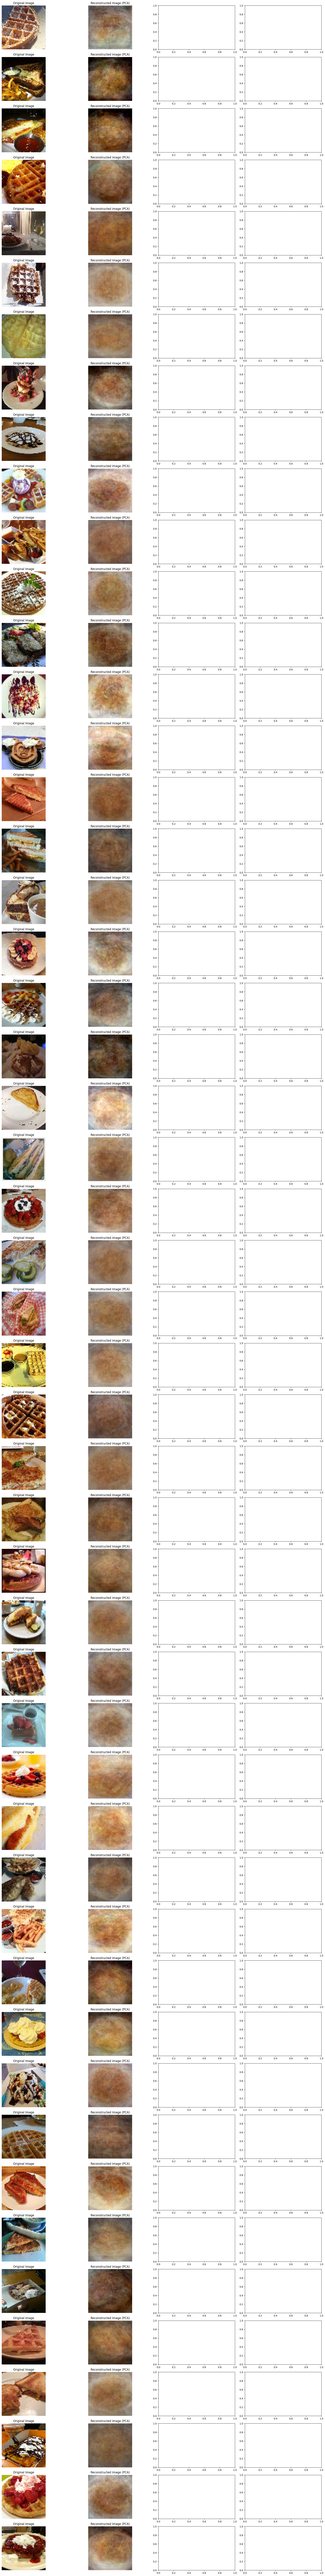

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.decomposition import PCA
from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection

# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Directory containing the images
image_dir = 'Original_dataset'

# Create a generator that yields batches of images
generator = datagen.flow_from_directory(
    image_dir,
    target_size=(64, 64),
    batch_size=50,
    class_mode='binary'  # or 'categorical' if you have more than two classes
)

# Initialize PCA and JL transformers
pca = PCA(n_components=2)
eps = 0.1  # Set your desired eps
n_components = johnson_lindenstrauss_min_dim(generator.samples, eps=eps)
transformer = GaussianRandomProjection(n_components=n_components)

# Number of images to display
n_images = 50

# Image size
IMAGE_SIZE = (64, 64, 3)

# Create a figure for the plots
fig, axs = plt.subplots(n_images, 4, figsize=(20, 150))

# Process multiple images
for i in range(n_images):
    # Get the next batch of images and labels
    images, labels = next(generator)

    # Flatten the images into vectors
    X = images.reshape((50, -1))  # Use 50 instead of BATCH_SIZE

    # Apply PCA and JL transformations
    X_pca = pca.fit_transform(X)
    X_jl = transformer.fit_transform(X)

    # Select the i-th image from the original, JLL-transformed, and PCA-transformed data
    original_image = images[i]

    # Get the shape of the transformed data
    jll_shape = X_jl[i].shape
    pca_shape = X_pca[i].shape

    # Calculate the next perfect square greater than the number of elements in the transformed images
    next_square = np.ceil(np.sqrt(jll_shape[0]))**2

    # Pad the transformed images with zeros until their size is the next perfect square
    jll_image_padded = np.pad(X_jl[i], (0, int(next_square - jll_shape[0])), 'constant')
    pca_image_padded = np.pad(X_pca[i], (0, int(next_square - pca_shape[0])), 'constant')

    # Reshape the padded images into 2D square shapes
    jll_image_2d = jll_image_padded.reshape((int(np.sqrt(next_square)), int(np.sqrt(next_square))))
    pca_image_2d = pca_image_padded.reshape((int(np.sqrt(next_square)), int(np.sqrt(next_square))))

    # Reconstruct the compressed image
    sample_image_compressed = pca.inverse_transform(X_pca[i].reshape(1, -1))

    # Plot the original, JLL, PCA, and reconstructed PCA images
    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(sample_image_compressed.reshape(IMAGE_SIZE), cmap='gray')
    axs[i, 1].set_title('Reconstructed Image (PCA)')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

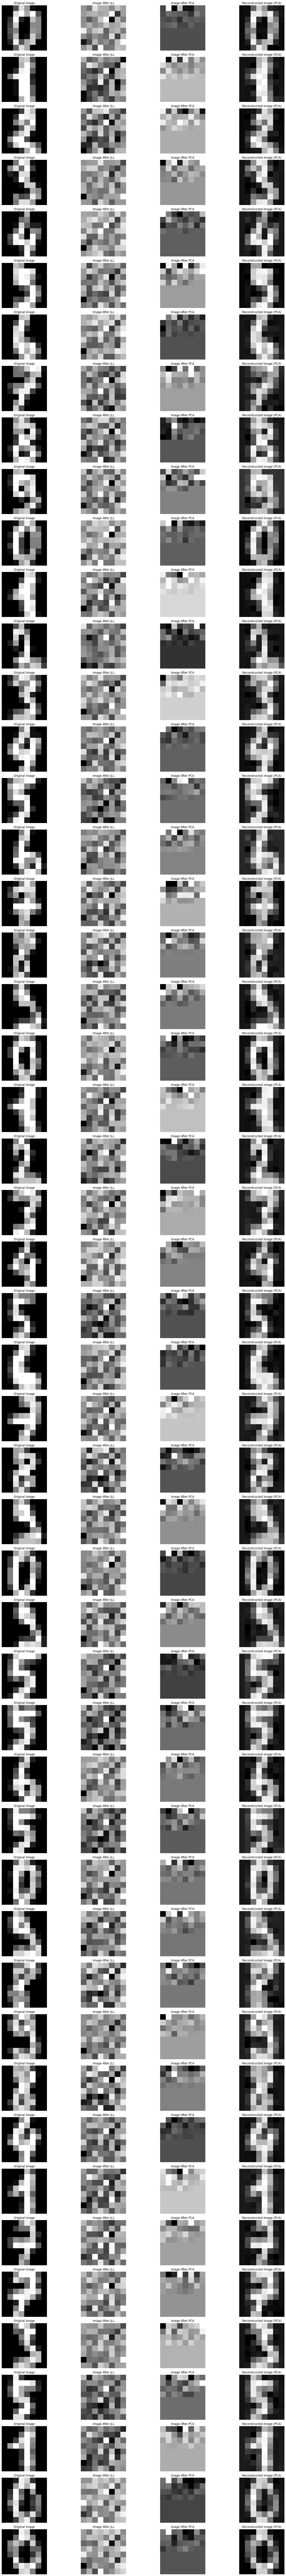

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from sklearn.random_projection import johnson_lindenstrauss_min_dim, SparseRandomProjection
from sklearn.decomposition import PCA

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize data

# Perform JLL transformation
jll_dim = johnson_lindenstrauss_min_dim(n_samples=50, eps=0.1)  # Increase eps to allow for higher distortion
jll = SparseRandomProjection(n_components=min(jll_dim, X.shape[1]))  # Don't keep more components than there are features
X_jl = jll.fit_transform(X)

# Perform PCA transformation
n_components = 30  # Number of components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Number of images to display
n_images = 50

# Image size
IMAGE_SIZE = (8, 8)  # Digits images are 8x8

# Create a figure for the plots
fig, axs = plt.subplots(n_images, 4, figsize=(20, 150))

# Process multiple images
for i in range(n_images):
    # Select the i-th image from the original, JLL-transformed, and PCA-transformed data
    original_image = X[i].reshape(IMAGE_SIZE)

    # Get the shape of the transformed data
    jll_shape = X_jl[i].shape
    pca_shape = X_pca[i].shape

    # Calculate the next perfect square greater than the number of elements in the transformed images
    next_square = np.ceil(np.sqrt(jll_shape[0]))**2

    # Pad the transformed images with zeros until their size is the next perfect square
    jll_image_padded = np.pad(X_jl[i], (0, int(next_square - jll_shape[0])), 'constant')
    pca_image_padded = np.pad(X_pca[i], (0, int(next_square - pca_shape[0])), 'constant')

    # Reshape the padded images into 2D square shapes
    jll_image_2d = jll_image_padded.reshape((int(np.sqrt(next_square)), int(np.sqrt(next_square))))
    pca_image_2d = pca_image_padded.reshape((int(np.sqrt(next_square)), int(np.sqrt(next_square))))

    # Reconstruct the compressed image
    sample_image_compressed = pca.inverse_transform(X_pca[i])

    # Plot the original, JLL, PCA, and reconstructed PCA images
    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(jll_image_2d, cmap='gray')  # Use a grayscale colormap for the transformed images
    axs[i, 1].set_title('Image After JLL')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(pca_image_2d, cmap='gray')  # Use a grayscale colormap for the transformed images
    axs[i, 2].set_title('Image After PCA')
    axs[i, 2].axis('off')

    axs[i, 3].imshow(sample_image_compressed.reshape(IMAGE_SIZE), cmap='gray')
    axs[i, 3].set_title('Reconstructed Image (PCA)')
    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from sklearn.random_projection import johnson_lindenstrauss_min_dim, SparseRandomProjection
from sklearn.decomposition import PCA

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize data

# Perform JLL transformation
jll_dim = johnson_lindenstrauss_min_dim(n_samples=50, eps=0.1)  # Increase eps to allow for higher distortion
jll = SparseRandomProjection(n_components=min(jll_dim, X.shape[1]))  # Don't keep more components than there are features
X_jl = jll.fit_transform(X)

# Perform PCA transformation
n_components = 30  # Number of components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Number of images to display
n_images = 50

# Image size
IMAGE_SIZE = (8, 8)  # Digits images are 8x8

# Create a figure for the plots
fig, axs = plt.subplots(n_images, 4, figsize=(20, 150))

# Process multiple images
for i in range(n_images):
    # Select the i-th image from the original, JLL-transformed, and PCA-transformed data
    original_image = X[i].reshape(IMAGE_SIZE)

    # Get the shape of the transformed data
    jll_shape = X_jl[i].shape
    pca_shape = X_pca[i].shape

    # Calculate the next perfect square greater than the number of elements in the transformed images
    next_square = np.ceil(np.sqrt(jll_shape[0]))**2

    # Pad the transformed images with zeros until their size is the next perfect square
    jll_image_padded = np.pad(X_jl[i], (0, int(next_square - jll_shape[0])), 'constant')
    pca_image_padded = np.pad(X_pca[i], (0, int(next_square - pca_shape[0])), 'constant')

    # Reshape the padded images into 2D square shapes
    jll_image_2d = jll_image_padded.reshape((int(np.sqrt(next_square)), int(np.sqrt(next_square))))
    pca_image_2d = pca_image_padded.reshape((int(np.sqrt(next_square)), int(np.sqrt(next_square))))

    # Reconstruct the compressed image
    sample_image_compressed = pca.inverse_transform(X_pca[i])

    # Plot the original, JLL, PCA, and reconstructed PCA images
    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(jll_image_2d, cmap='gray')  # Use a grayscale colormap for the transformed images
    axs[i, 1].set_title('Image After JLL')
    axs[i, 1].axis('off')

    axs[i, 2].imshow(pca_image_2d, cmap='gray')  # Use a grayscale colormap for the transformed images
    axs[i, 2].set_title('Image After PCA')
    axs[i, 2].axis('off')

    axs[i, 3].imshow(sample_image_compressed.reshape(IMAGE_SIZE), cmap='gray')
    axs[i, 3].set_title('Reconstructed Image (PCA)')
    axs[i, 3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import time
import numpy as np
from sklearn.decomposition import PCA
from sklearn.random_projection import johnson_lindenstrauss_min_dim, GaussianRandomProjection
from keras.preprocessing.image import ImageDataGenerator

# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

# Directory containing the images
image_dir = 'Original_dataset'

# Create a generator that yields batches of images
generator = datagen.flow_from_directory(
    image_dir,
    target_size=(64, 64),
    batch_size=100,
    class_mode='binary'  # or 'categorical' if you have more than two classes
)

# Initialize PCA and JL transformers
pca = PCA(n_components=2)
eps = 0.1  # Set your desired eps
n_components = johnson_lindenstrauss_min_dim(generator.samples, eps=eps)
transformer = GaussianRandomProjection(n_components=n_components)

# Initialize lists to store transformed data and computation times
X_train_pca = []
X_train_jl = []
pca_times = []
jl_times = []

# Process all batches of images
for i in range(generator.samples // generator.batch_size):
    # Get the next batch of images and labels
    images, labels = next(generator)

    # Flatten the images into vectors
    X = images.reshape((images.shape[0], -1))

    # Apply PCA
    start_time = time.time()
    X_train_pca.append(pca.fit_transform(X))
    end_time = time.time()
    pca_times.append(end_time - start_time)

    # Apply JL transformation
    start_time = time.time()
    X_train_jl.append(transformer.fit_transform(X))
    end_time = time.time()
    jl_times.append(end_time - start_time)

# Convert lists to arrays
X_train_pca = np.concatenate(X_train_pca, axis=0)
X_train_jl = np.concatenate(X_train_jl, axis=0)

# Calculate average computation times
avg_pca_time = np.mean(pca_times)
avg_jl_time = np.mean(jl_times)

print(f"Average PCA computation time: {avg_pca_time} seconds")
print(f"Average JL computation time: {avg_jl_time} seconds")

Found 2000 images belonging to 2 classes.
Average PCA computation time: 1.5995190024375916 seconds
Average JL computation time: 1.591729426383972 seconds


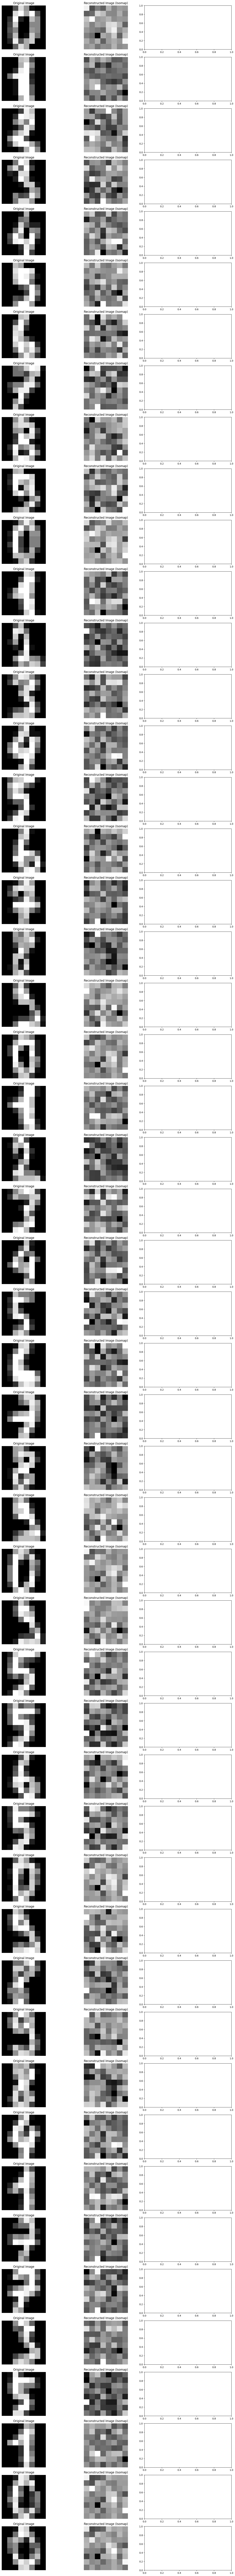

In [38]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import numpy as np
from sklearn.random_projection import johnson_lindenstrauss_min_dim, SparseRandomProjection
from sklearn.manifold import Isomap, MDS

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize data

# Perform JLL transformation
jll_dim = johnson_lindenstrauss_min_dim(n_samples=50, eps=0.1)  # Increase eps to allow for higher distortion
jll = SparseRandomProjection(n_components=min(jll_dim, X.shape[1]))  # Don't keep more components than there are features
X_jl = jll.fit_transform(X)

# Perform Isomap transformation
n_neighbors = 30  # Number of neighbors to consider for each point
n_components = 2  # Number of dimensions in which to immerse the dissimilarities
iso = Isomap(n_neighbors=n_neighbors, n_components=n_components)
X_iso = iso.fit_transform(X)

# Perform MDS to approximate the inverse Isomap transformation
mds = MDS(n_components=X.shape[1], dissimilarity='precomputed')
X_mds = mds.fit_transform(iso.dist_matrix_)

# Number of images to display
n_images = 50

# Image size
IMAGE_SIZE = (8, 8)  # Digits images are 8x8

# Create a figure for the plots
fig, axs = plt.subplots(n_images, 3, figsize=(15, 150))

# Process multiple images
for i in range(n_images):
    # Select the i-th image from the original, JLL-transformed, and Isomap-transformed data
    original_image = X[i].reshape(IMAGE_SIZE)

    # Get the shape of the transformed data
    jll_shape = X_jl[i].shape
    iso_shape = X_iso[i].shape

    # Calculate the next perfect square greater than the number of elements in the transformed images
    next_square = np.ceil(np.sqrt(jll_shape[0]))**2

    # Pad the transformed images with zeros until their size is the next perfect square
    jll_image_padded = np.pad(X_jl[i], (0, int(next_square - jll_shape[0])), 'constant')
    iso_image_padded = np.pad(X_iso[i], (0, int(next_square - iso_shape[0])), 'constant')

    # Reshape the padded images into 2D square shapes
    jll_image_2d = jll_image_padded.reshape((int(np.sqrt(next_square)), int(np.sqrt(next_square))))
    iso_image_2d = iso_image_padded.reshape((int(np.sqrt(next_square)), int(np.sqrt(next_square))))

    # Reconstruct the compressed image
    sample_image_compressed = X_mds[i].reshape(IMAGE_SIZE)

    # Plot the original, JLL, and Isomap images
    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(sample_image_compressed, cmap='gray')
    axs[i, 1].set_title('Reconstructed Image (Isomap)')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

Epoch 1/100
8/8 [==============================] - 0s 841us/step - loss: 0.7012
Epoch 2/100
8/8 [==============================] - 0s 786us/step - loss: 0.7012
Epoch 3/100
8/8 [==============================] - 0s 790us/step - loss: 0.7012
Epoch 4/100
8/8 [==============================] - 0s 654us/step - loss: 0.7011
Epoch 5/100
8/8 [==============================] - 0s 527us/step - loss: 0.7011
Epoch 6/100
8/8 [==============================] - 0s 608us/step - loss: 0.7011
Epoch 7/100
8/8 [==============================] - 0s 494us/step - loss: 0.7010
Epoch 8/100
8/8 [==============================] - 0s 506us/step - loss: 0.7010
Epoch 9/100
8/8 [==============================] - 0s 658us/step - loss: 0.7010
Epoch 10/100
8/8 [==============================] - 0s 666us/step - loss: 0.7009
Epoch 11/100
8/8 [==============================] - 0s 586us/step - loss: 0.7009
Epoch 12/100
8/8 [==============================] - 0s 611us/step - loss: 0.7009
Epoch 13/100
8/8 [===================

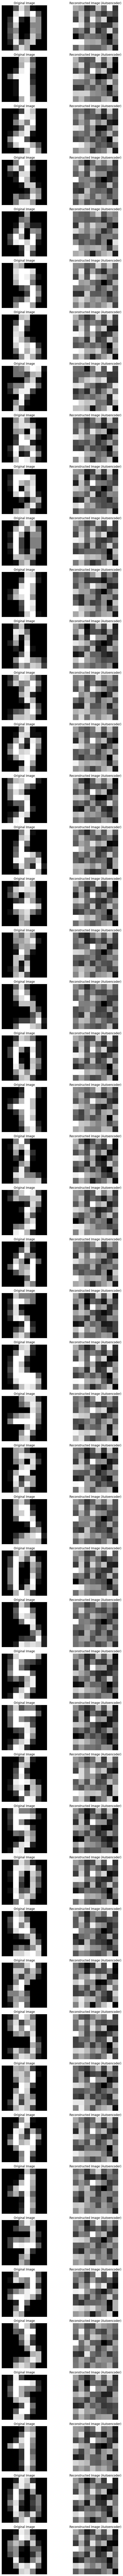

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from keras.layers import Input, Dense
from keras.models import Model

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize data

# Image size
IMAGE_SIZE = (8, 8)  # Digits images are 8x8

# Size of encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 64, assuming the input is 2048 floats

# Input placeholder
input_img = Input(shape=(64,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(64, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# This model maps an input to its encoded representation
encoder = Model(input_img, encoded)

# Create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(X, X,
                epochs=100,
                batch_size=256,
                shuffle=True)

# Number of images to display
n_images = 50

# Create a figure for the plots
fig, axs = plt.subplots(n_images, 2, figsize=(10, 150))

# Process multiple images
for i in range(n_images):
    # Select the i-th image from the original data
    original_image = X[i].reshape(IMAGE_SIZE)

    # Encode and decode the image
    encoded_img = encoder.predict(X[i].reshape(1, -1))
    decoded_img = decoder.predict(encoded_img)

    # Plot the original and reconstructed images
    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(decoded_img.reshape(IMAGE_SIZE), cmap='gray')
    axs[i, 1].set_title('Reconstructed Image (Autoencoder)')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

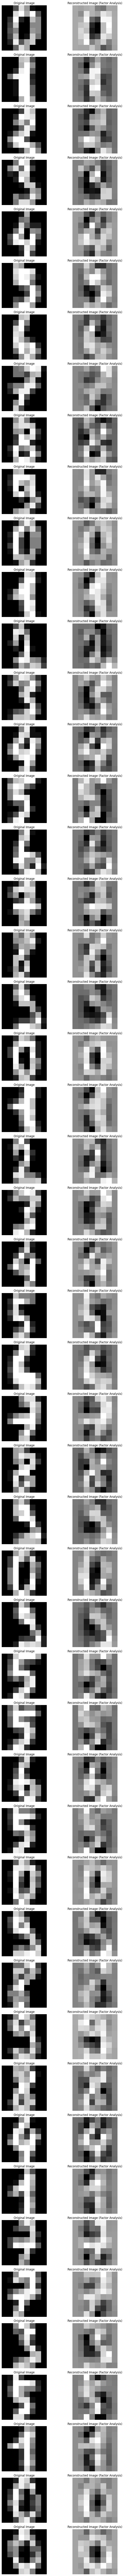

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import FactorAnalysis
import numpy as np

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize data

# Image size
IMAGE_SIZE = (8, 8)  # Digits images are 8x8

# Size of encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 64, assuming the input is 2048 floats

# Apply Factor Analysis
transformer = FactorAnalysis(n_components=encoding_dim, random_state=0)
X_transformed = transformer.fit_transform(X)

# Manually compute the inverse transformation
X_inverse_transformed = np.dot(X_transformed, transformer.components_)

# Number of images to display
n_images = 50

# Create a figure for the plots
fig, axs = plt.subplots(n_images, 2, figsize=(10, 150))

# Process multiple images
for i in range(n_images):
    # Select the i-th image from the original data
    original_image = X[i].reshape(IMAGE_SIZE)

    # Inverse transform the image
    inverse_transformed_image = X_inverse_transformed[i].reshape(IMAGE_SIZE)

    # Plot the original and reconstructed images
    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(inverse_transformed_image, cmap='gray')
    axs[i, 1].set_title('Reconstructed Image (Factor Analysis)')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


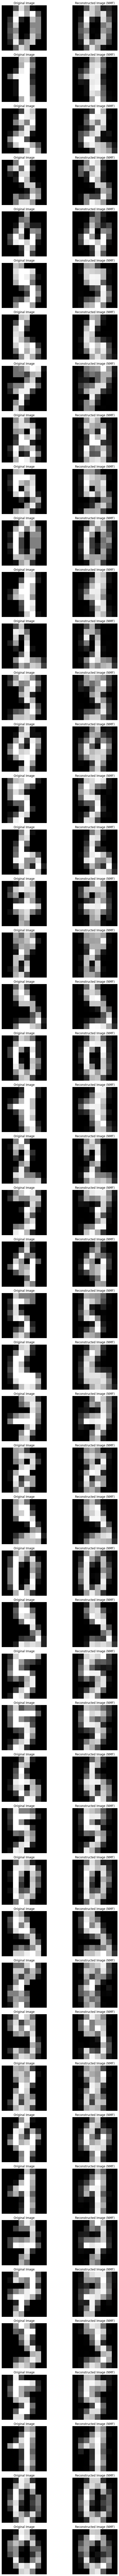

In [41]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import NMF
import numpy as np

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize data

# Image size
IMAGE_SIZE = (8, 8)  # Digits images are 8x8

# Size of encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 64, assuming the input is 2048 floats

# Apply NMF
transformer = NMF(n_components=encoding_dim, random_state=0)
X_transformed = transformer.fit_transform(X)

# Compute the inverse transformation
X_inverse_transformed = transformer.inverse_transform(X_transformed)

# Number of images to display
n_images = 50

# Create a figure for the plots
fig, axs = plt.subplots(n_images, 2, figsize=(10, 150))

# Process multiple images
for i in range(n_images):
    # Select the i-th image from the original data
    original_image = X[i].reshape(IMAGE_SIZE)

    # Inverse transform the image
    inverse_transformed_image = X_inverse_transformed[i].reshape(IMAGE_SIZE)

    # Plot the original and reconstructed images
    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(inverse_transformed_image, cmap='gray')
    axs[i, 1].set_title('Reconstructed Image (NMF)')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

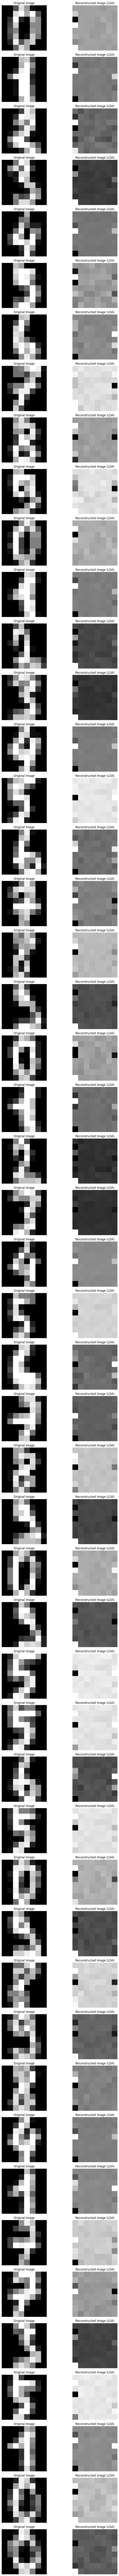

In [43]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize data
y = digits.target  # Class labels

# Image size
IMAGE_SIZE = (8, 8)  # Digits images are 8x8

# Size of encoded representations
encoding_dim = 9  # LDA can only reduce to at most n_classes - 1 dimensions

# Apply LDA
transformer = LDA(n_components=encoding_dim)
X_transformed = transformer.fit_transform(X, y)

# Compute the inverse transformation
X_inverse_transformed = transformer.scalings_.dot(X_transformed.T).T

# Number of images to display
n_images = 50

# Create a figure for the plots
fig, axs = plt.subplots(n_images, 2, figsize=(10, 150))

# Process multiple images
for i in range(n_images):
    # Select the i-th image from the original data
    original_image = X[i].reshape(IMAGE_SIZE)

    # Inverse transform the image
    inverse_transformed_image = X_inverse_transformed[i].reshape(IMAGE_SIZE)

    # Plot the original and reconstructed images
    axs[i, 0].imshow(original_image, cmap='gray')
    axs[i, 0].set_title('Original Image')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(inverse_transformed_image, cmap='gray')
    axs[i, 1].set_title('Reconstructed Image (LDA)')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import Isomap
from sklearn.decomposition import FactorAnalysis, NMF, PCA
from sklearn.random_projection import SparseRandomProjection
from sklearn.neural_network import MLPRegressor  # For Autoencoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_digits
import time

# Load the digits dataset
digits = load_digits()
X = digits.data / 16.0  # Normalize data
y = digits.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformations
jll_dim = 64  # Replace with the actual dimension for JLL
n_components = 2  # Replace with the actual number of components for PCA
transformations = {
    'Original': None,
    'JLL Transformed': SparseRandomProjection(n_components=min(jll_dim, X.shape[1])),
    'PCA Transformed': PCA(n_components=n_components),
    'LDA Transformed': LDA(n_components=1),
    'ISOMAP Transformed': Isomap(n_components=2),
    'Factor Analysis Transformed': FactorAnalysis(n_components=2),
    'NMF Transformed': NMF(n_components=2),
    'AutoEncoders Transformed': MLPRegressor(hidden_layer_sizes=(64, 32, 64), max_iter=200)
}

# Initialize the logistic regression model
model = LogisticRegression()

# DataFrame to store results
results = pd.DataFrame(columns=['Dataset', 'Accuracy', 'F-1 Score', 'Compute Time'])

# Calculate metrics for each transformation
for name, transformer in transformations.items():
    start_time = time.time()
    if name == 'Original':
        X_train_trans, X_test_trans = X_train, X_test
    elif name == 'AutoEncoders Transformed':
        transformer.fit(X_train, X_train)
        X_train_trans = transformer.predict(X_train)
        X_test_trans = transformer.predict(X_test)
    elif name == 'LDA Transformed':
        X_train_trans = transformer.fit_transform(X_train, y_train)
        X_test_trans = transformer.transform(X_test)
    else:
        X_train_trans = transformer.fit_transform(X_train)
        X_test_trans = transformer.transform(X_test)

    model.fit(X_train_trans, y_train)
    y_pred = model.predict(X_test_trans)

    end_time = time.time()
    compute_time = end_time - start_time

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results = pd.concat([results, pd.DataFrame({'Dataset': [name], 'Accuracy': [accuracy], 'F-1 Score': [f1], 'Compute Time': [compute_time]})], ignore_index=True)

# Print the results
print(results)

/var/folders/tc/9srvxb_11h5bpdgnjy16lbqr0000gn/T/ipykernel_52571/2189642529.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Dataset': [name], 'Accuracy': [accuracy], 'F-1 Score': [f1], 'Compute Time': [compute_time]})], ignore_index=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/manifold/_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/opt/homebrew/lib/python3.11/site-packages/scipy/sparse/_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is mor

                       Dataset  Accuracy  F-1 Score  Compute Time
0                     Original  0.966667   0.966834      0.259468
1              JLL Transformed  0.961111   0.961420      0.085859
2              PCA Transformed  0.644444   0.638728      1.438786
3              LDA Transformed  0.436111   0.413143      0.402794
4           ISOMAP Transformed  0.872222   0.871411      3.660271
5  Factor Analysis Transformed  0.472222   0.444967     20.862290
6              NMF Transformed  0.280556   0.193334      1.196092
7     AutoEncoders Transformed  0.955556   0.955675      1.868876


In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import Isomap
from sklearn.decomposition import FactorAnalysis, NMF, PCA
from sklearn.random_projection import SparseRandomProjection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from keras.layers import Input, Dense
from keras.models import Model
import time

# Load the text data
with open('text.txt', 'r') as file:
    texts = file.read().splitlines()
print(f"Number of lines in text file: {len(texts)}")

# Assume that the first half of the texts are class 0 and the second half are class 1
half = len(texts) // 2
y = [0] * half + [1] * (len(texts) - half)

# Convert the text data into a numerical format
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(texts)
print(f"Number of samples in X: {X.shape[0]}")

# Convert the labels into a numerical format
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(f"Number of samples in y: {len(y)}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define transformations
jll_dim = 64  # Replace with the actual dimension for JLL
n_components = 2  # Replace with the actual number of components for PCA
transformations = {
    'Original': None,
    'JLL Transformed': SparseRandomProjection(n_components=min(jll_dim, X.shape[1])),
    'PCA Transformed': PCA(n_components=n_components),
    'LDA Transformed': LDA(n_components=1),
    'ISOMAP Transformed': Isomap(n_components=2),
    'Factor Analysis Transformed': FactorAnalysis(n_components=2),
    'NMF Transformed': NMF(n_components=2),
}

# Initialize the logistic regression model
model = LogisticRegression()

# DataFrame to store results
results = pd.DataFrame(columns=['Dataset', 'Accuracy', 'F-1 Score', 'Compute Time'])

# Calculate metrics for each transformation
for name, transformer in transformations.items():
    start_time = time.time()
    if name == 'Original':
        X_train_trans, X_test_trans = X_train, X_test
    elif name == 'LDA Transformed':
        X_train_trans = transformer.fit_transform(X_train.toarray(), y_train)
        X_test_trans = transformer.transform(X_test.toarray())
    else:
        X_train_trans = transformer.fit_transform(X_train.toarray())
        X_test_trans = transformer.transform(X_test.toarray())

    model.fit(X_train_trans, y_train)
    y_pred = model.predict(X_test_trans)

    end_time = time.time()
    compute_time = end_time - start_time

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    results = pd.concat([results, pd.DataFrame({'Dataset': [name], 'Accuracy': [accuracy], 'F-1 Score': [f1], 'Compute Time': [compute_time]})], ignore_index=True)

# Autoencoder
encoding_dim = 32
input_img = Input(shape=(X_train.shape[1],))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(X_train.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

start_time = time.time()
autoencoder.fit(X_train.toarray(), X_train.toarray(),
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test.toarray(), X_test.toarray()))

X_train_trans = autoencoder.predict(X_train.toarray())
X_test_trans = autoencoder.predict(X_test.toarray())

model.fit(X_train_trans, y_train)
y_pred = model.predict(X_test_trans)

end_time = time.time()
compute_time = end_time - start_time

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

results = pd.concat([results, pd.DataFrame({'Dataset': ['AutoEncoders Transformed'], 'Accuracy': [accuracy], 'F-1 Score': [f1], 'Compute Time': [compute_time]})], ignore_index=True)

# Print the results
print(results)

Number of lines in text file: 100
Number of samples in X: 100
Number of samples in y: 100


/var/folders/tc/9srvxb_11h5bpdgnjy16lbqr0000gn/T/ipykernel_52571/3837167187.py:77: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({'Dataset': [name], 'Accuracy': [accuracy], 'F-1 Score': [f1], 'Compute Time': [compute_time]})], ignore_index=True)


Epoch 1/100
1/1 [==============================] - 0s 269ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 8/100
1/1 [==============================] - 0s 23ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 9/100
1/1 [==============================] - 0s 20ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6931 - val_loss: 0.6931
Epoch 11/100
1/1 [